In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [5]:
path = r'C:\Users\aaron\OneDrive\Desktop\Health Insurance Analysis'

In [7]:
path

'C:\\Users\\aaron\\OneDrive\\Desktop\\Health Insurance Analysis'

In [9]:
# installing dataframe
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'updated_region.csv'), index_col = False)

In [11]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,West,16884.92
1,18,male,33.8,1,no,South,1725.55
2,28,male,33.0,3,no,South,4449.46
3,33,male,22.7,0,no,Midwest,21984.47
4,32,male,28.9,0,no,Midwest,3866.86


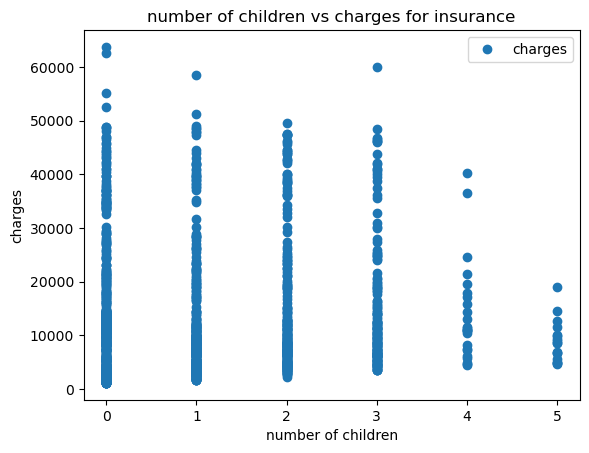

In [17]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'children', y='charges',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('number of children vs charges for insurance')  
plt.xlabel('number of children')  
plt.ylabel('charges')  
plt.show()

# hypothesis
* insurnace is more for people who have more than one kid.

In [22]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['children'].values.reshape(-1,1)
y = df['charges'].values.reshape(-1,1)

In [24]:
X

array([[0],
       [1],
       [3],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [26]:
y

array([[16884.92],
       [ 1725.55],
       [ 4449.46],
       ...,
       [ 1629.83],
       [ 2007.94],
       [29141.36]])

In [28]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Regression Analysis 

In [32]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [34]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [36]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

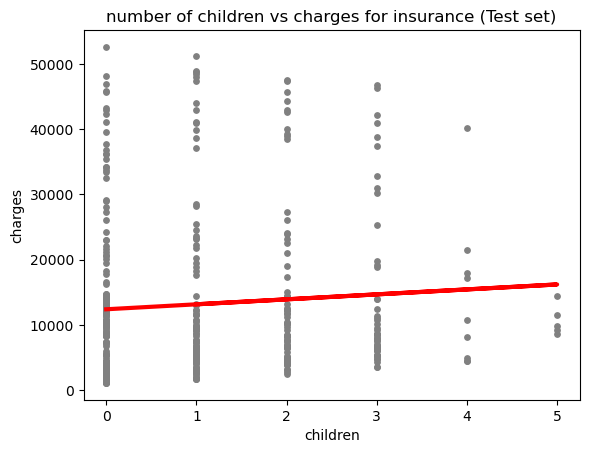

In [38]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('number of children vs charges for insurance (Test set)')
plot_test.xlabel('number of children')
plot_test.ylabel('charges')
plot_test.show()

In [40]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [42]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[760.2969752]]
Mean squared error:  159205990.61179468
R2 score:  0.0016521840350333106


In [44]:
y_predicted

array([[13171.18302338],
       [13171.18302338],
       [13931.47999858],
       [12410.88604818],
       [12410.88604818],
       [12410.88604818],
       [12410.88604818],
       [14691.77697378],
       [14691.77697378],
       [14691.77697378],
       [14691.77697378],
       [13931.47999858],
       [13171.18302338],
       [12410.88604818],
       [12410.88604818],
       [14691.77697378],
       [12410.88604818],
       [13171.18302338],
       [13931.47999858],
       [12410.88604818],
       [13931.47999858],
       [13931.47999858],
       [12410.88604818],
       [12410.88604818],
       [12410.88604818],
       [13171.18302338],
       [12410.88604818],
       [14691.77697378],
       [12410.88604818],
       [13931.47999858],
       [14691.77697378],
       [13171.18302338],
       [12410.88604818],
       [12410.88604818],
       [12410.88604818],
       [12410.88604818],
       [13931.47999858],
       [13171.18302338],
       [13931.47999858],
       [12410.88604818],


In [46]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,9724.53,13171.183023
1,8547.69,13171.183023
2,45702.02,13931.479999
3,12950.07,12410.886048
4,9644.25,12410.886048
5,4500.34,12410.886048
6,2198.19,12410.886048
7,11436.74,14691.776974
8,7537.16,14691.776974
9,5425.02,14691.776974


compare how the regression fits the training set

In [49]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [51]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [53]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[760.2969752]]
Mean squared error:  140148906.69421878
R2 score:  0.0059390762705852085


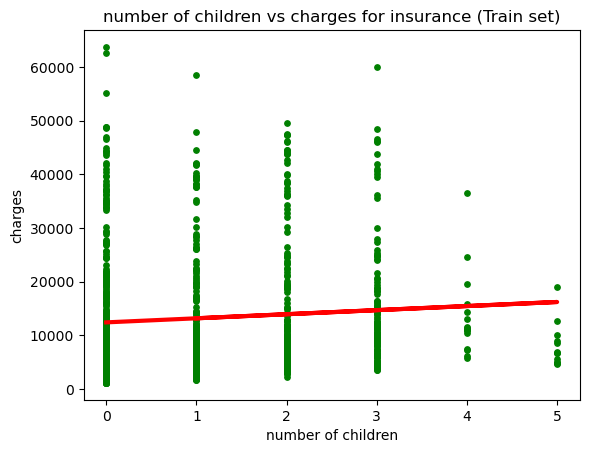

In [55]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('number of children vs charges for insurance (Train set)')
plot_test.xlabel('number of children')
plot_test.ylabel('charges')
plot_test.show()

# Slope: [[760.2969752]]
The slope of 760.3 indicates the rate of change of the dependent variable (y) with respect to the independent variable (x). This means that for every 1-unit increase in the independent variable, the dependent variable is predicted to increase by 760.3 units.
While the magnitude of the slope is large, this alone doesn't tell you how well the model fits the data; we need to consider the R² score and mean squared error to assess the quality of the model.

# Mean Squared Error (MSE): 159205990.61179468
MSE measures how far off your model's predictions are from the true values, squared. A value like 159,205,990 suggests that the model is making predictions that are relatively far from the actual values on average.
A lower MSE indicates a better fit, so this high MSE implies that the model is not fitting the data well.

# R² Score: 0.0016521840350333106
The R² score (coefficient of determination) tells me how well the model explains the variation in the dependent variable.
An R² score close to 0 (in this case, 0.0016) indicates that the model is doing a very poor job of explaining the variance in the target variable. In other words, the independent variable(s) do not have much predictive power for the target variable.